In [105]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pickle
from glob import glob

In [106]:
pickles = glob('./triple_*/*.pickle')
robot_data = {0:[],1:[],2:[]}
for i in pickles:
    if 'policy_0' in i:
        robot_data[0].append(i)
    elif 'policy_2' in i:
        robot_data[1].append(i)
    else:
        robot_data[2].append(i)
        
robot_data

{0: ['./triple_expt_4/REPS_2_rho_theta_policy_0.pickle',
  './triple_expt_5/REPS_2_rho_theta_policy_0.pickle',
  './triple_expt/REPS_2_rho_theta_policy_0.pickle',
  './triple_expt_3/REPS_2_rho_theta_policy_0.pickle',
  './triple_expt_2/REPS_2_rho_theta_policy_0.pickle',
  './triple_expt_1/REPS_2_rho_theta_policy_0.pickle',
  './triple_expt_0/REPS_2_rho_theta_policy_0.pickle'],
 1: ['./triple_expt_4/REPS_2_rho_theta_policy_2.pickle',
  './triple_expt_5/REPS_2_rho_theta_policy_2.pickle',
  './triple_expt/REPS_2_rho_theta_policy_2.pickle',
  './triple_expt_3/REPS_2_rho_theta_policy_2.pickle',
  './triple_expt_2/REPS_2_rho_theta_policy_2.pickle',
  './triple_expt_1/REPS_2_rho_theta_policy_2.pickle',
  './triple_expt_0/REPS_2_rho_theta_policy_2.pickle'],
 2: ['./triple_expt_4/REPS_2_rho_theta_policy_3.pickle',
  './triple_expt_5/REPS_2_rho_theta_policy_3.pickle',
  './triple_expt/REPS_2_rho_theta_policy_3.pickle',
  './triple_expt_3/REPS_2_rho_theta_policy_3.pickle',
  './triple_expt_2/REPS

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [-0.06989598 -0.01257159  0.72632595  0.52341608]


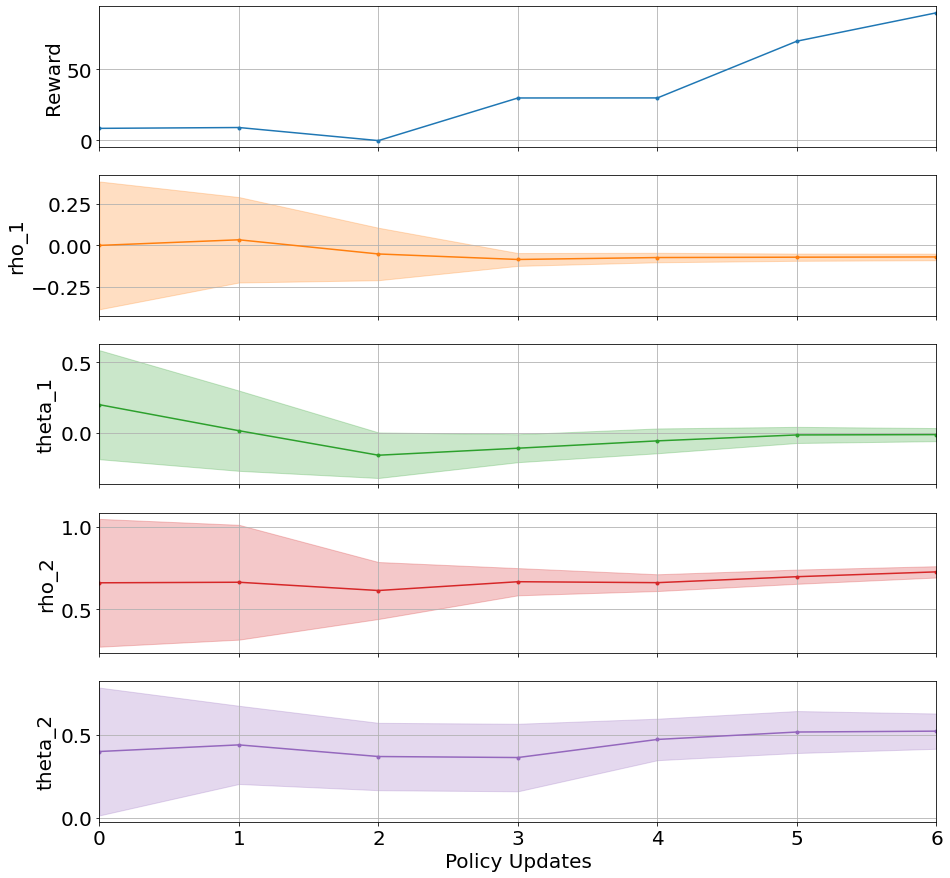

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [-0.03915416 -0.10633106  0.7405601   0.43048915]


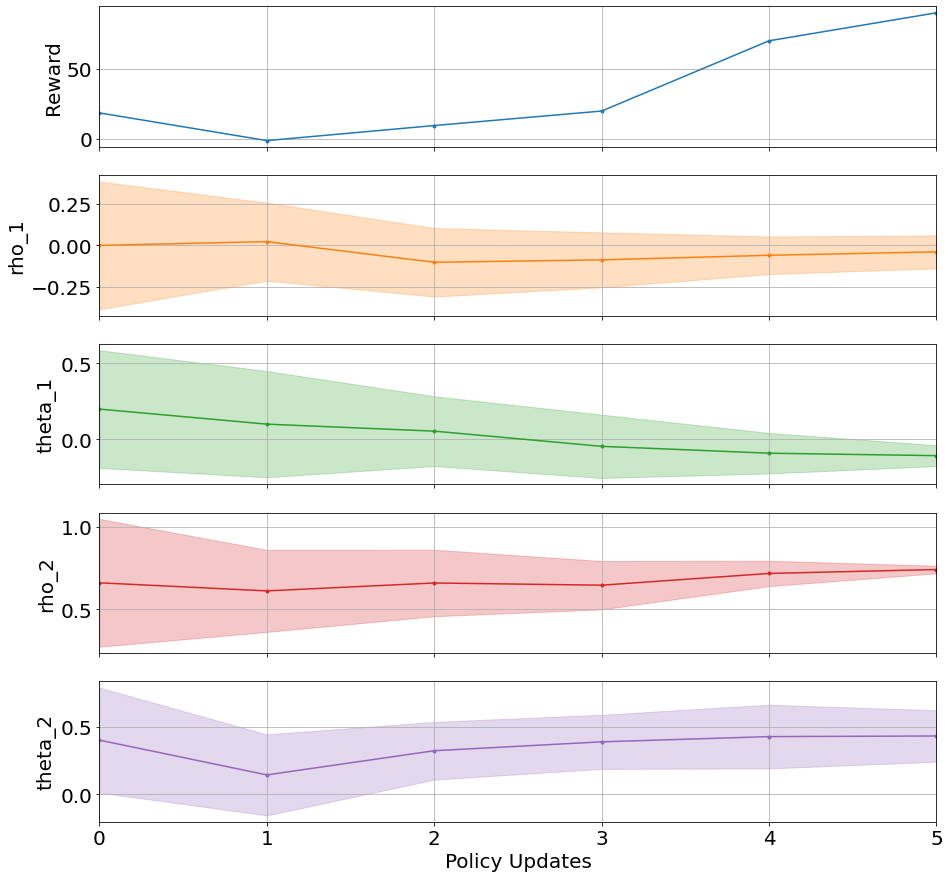

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [0.02508761 0.14224868 0.72889659 1.03658845]


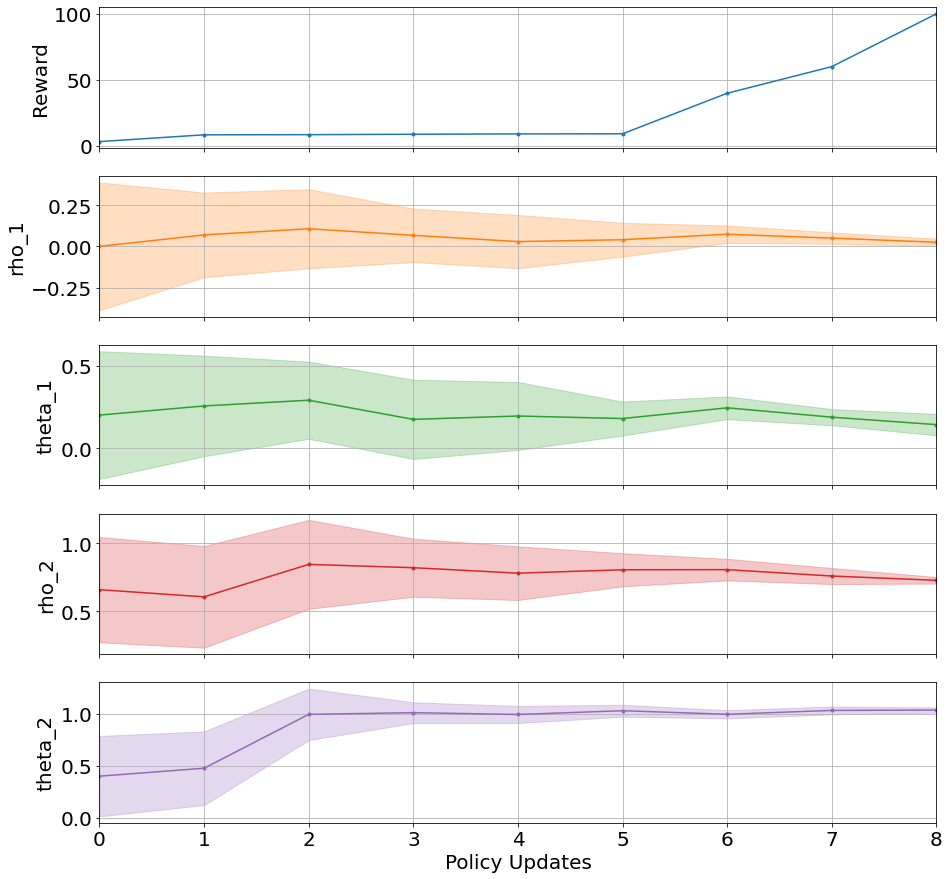

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [-0.1575094   0.13289006  0.69695806  0.39172959]


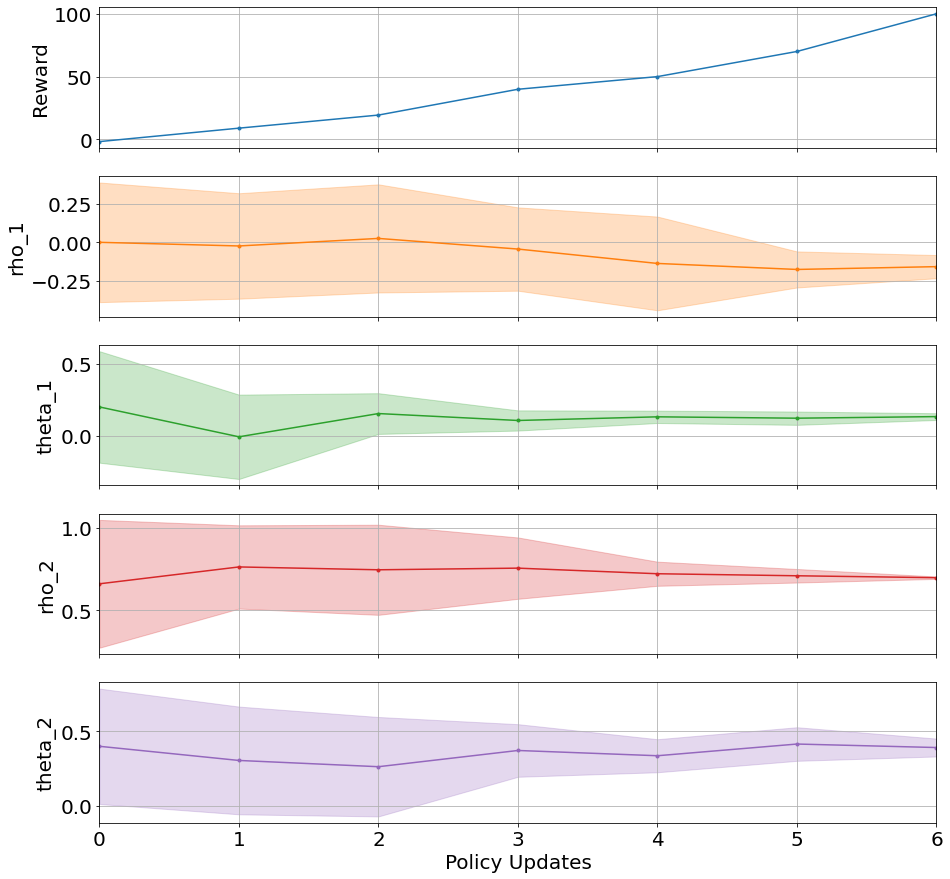

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [0.3401568  0.18148755 0.7430156  0.39493012]


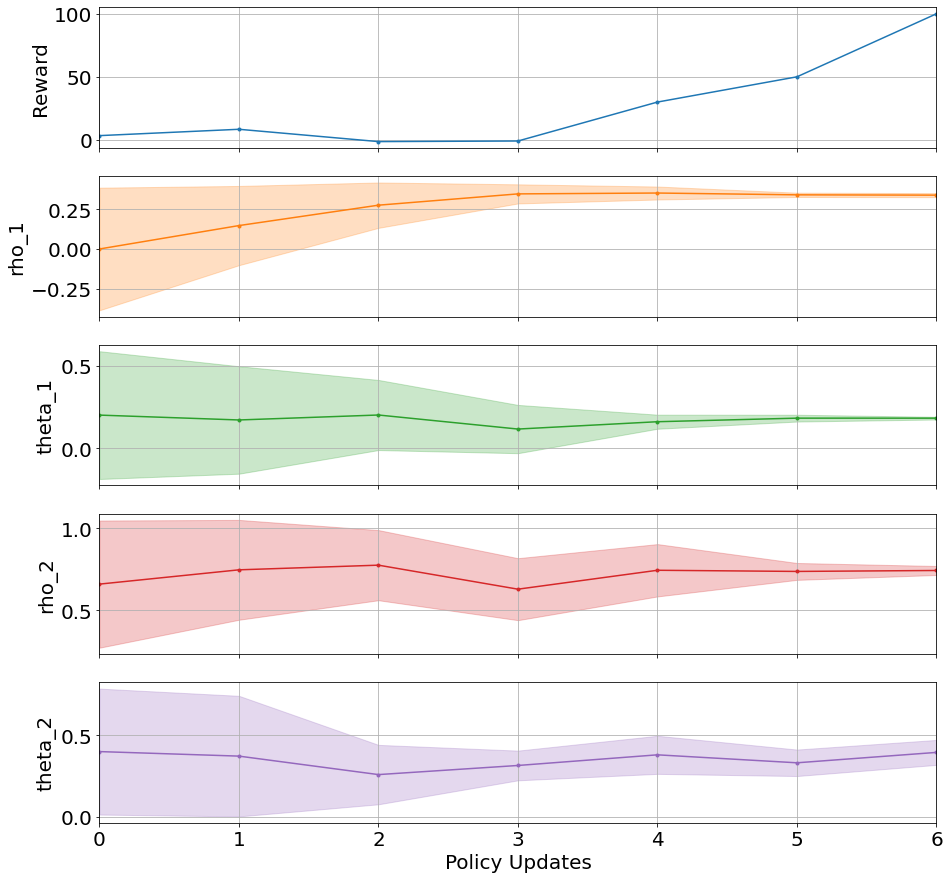

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [-0.45137015  0.10593031  0.69961116  0.05275797]


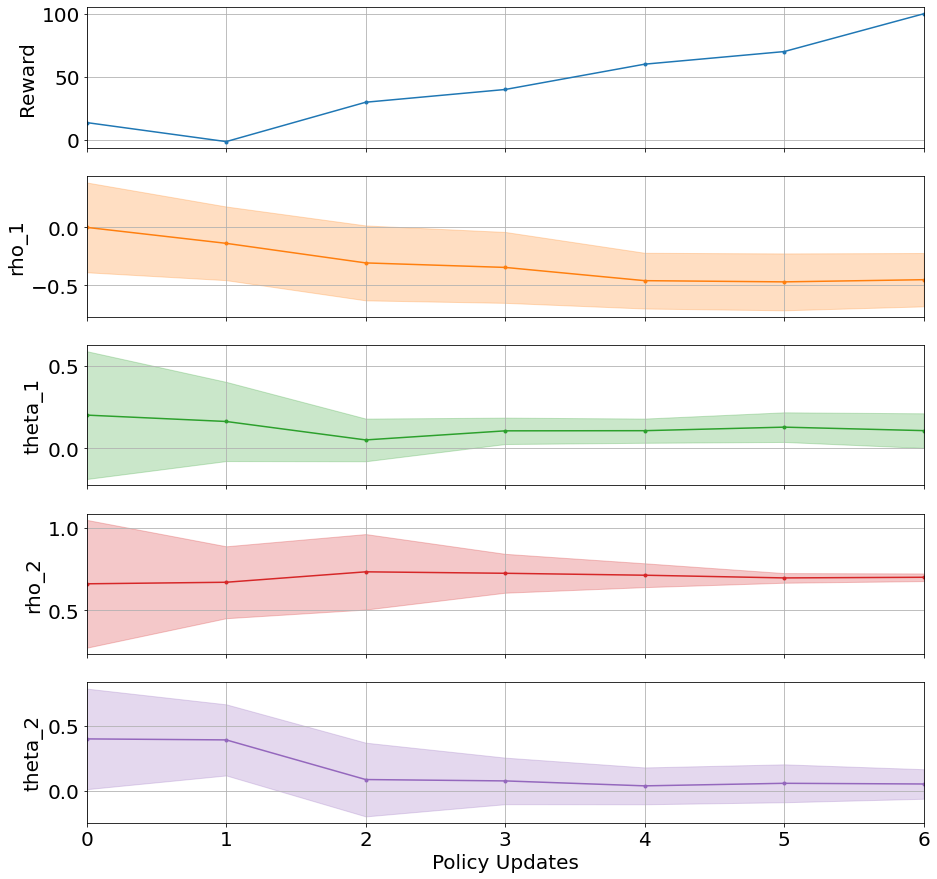

REPS solve info for "0":
 -> Solved: True
 -> Parameters (mean): [0.23237009 0.10087456 0.7442577  0.25347964]


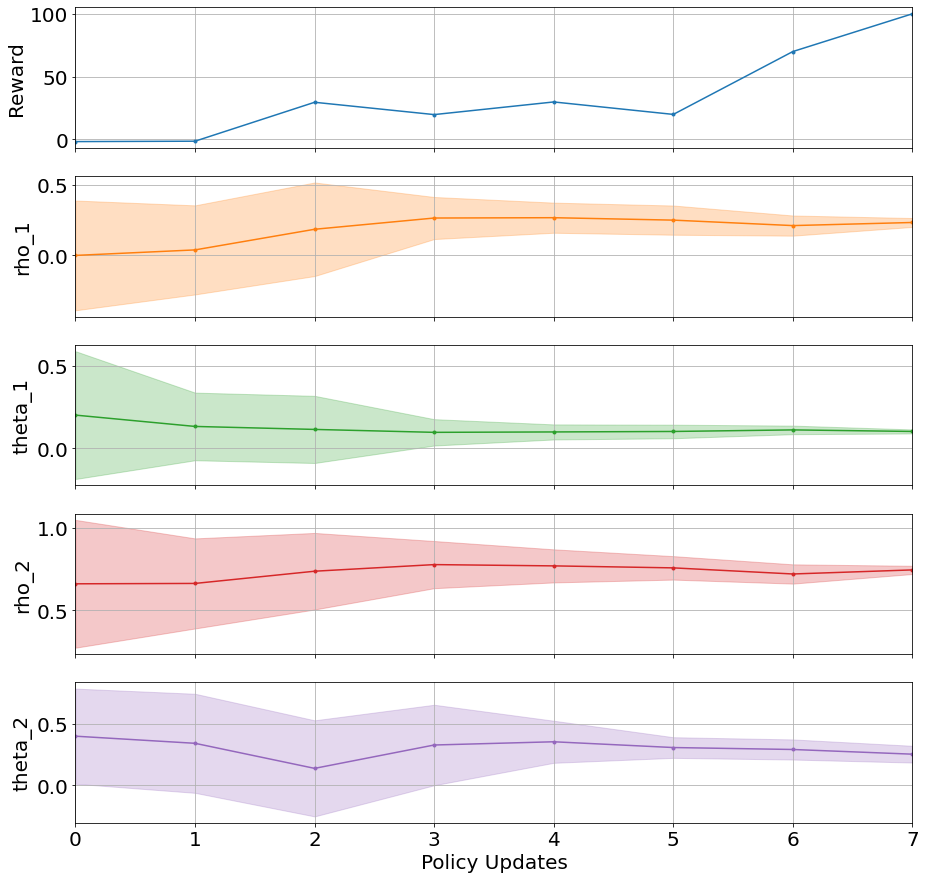

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [0.53226606 0.01748133 0.61683095 0.62206697]


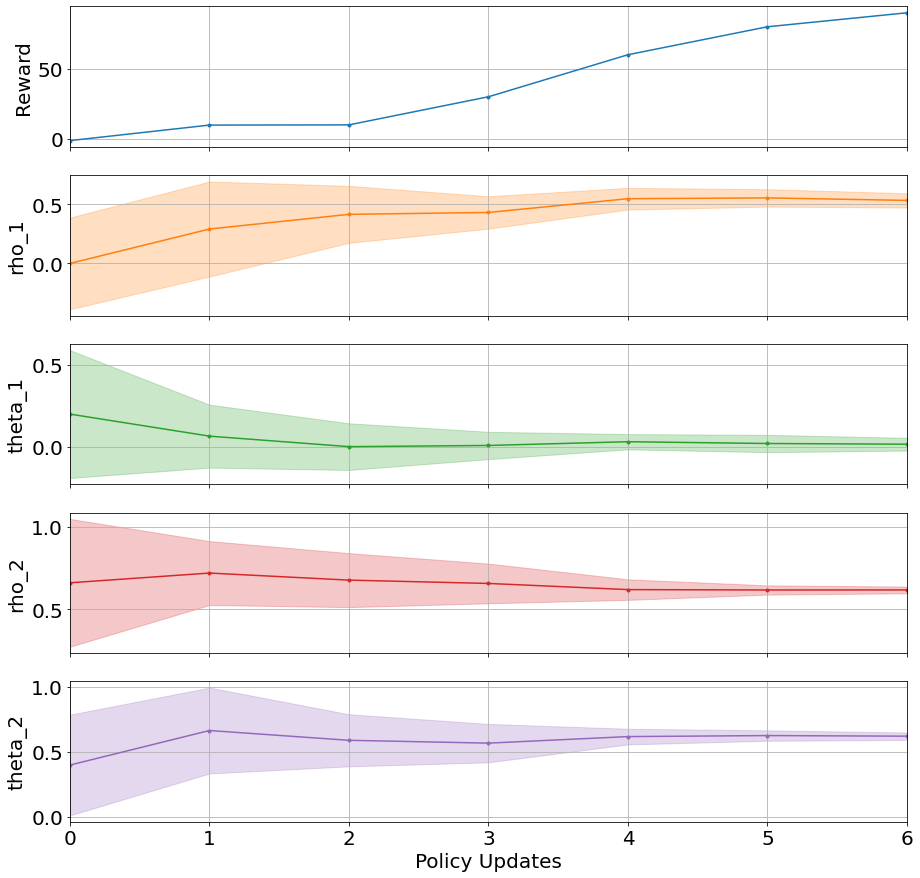

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [-0.34316146 -0.0656327   0.62729941  0.18654595]


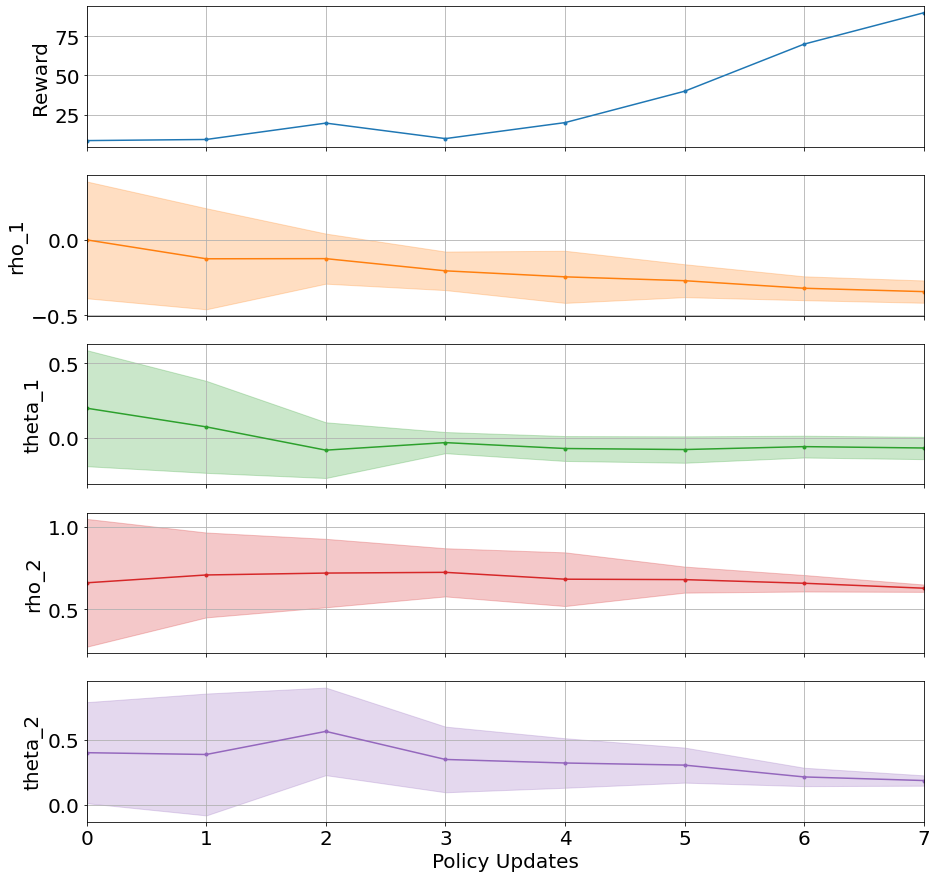

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [0.05677532 0.04344432 0.59902275 0.366478  ]


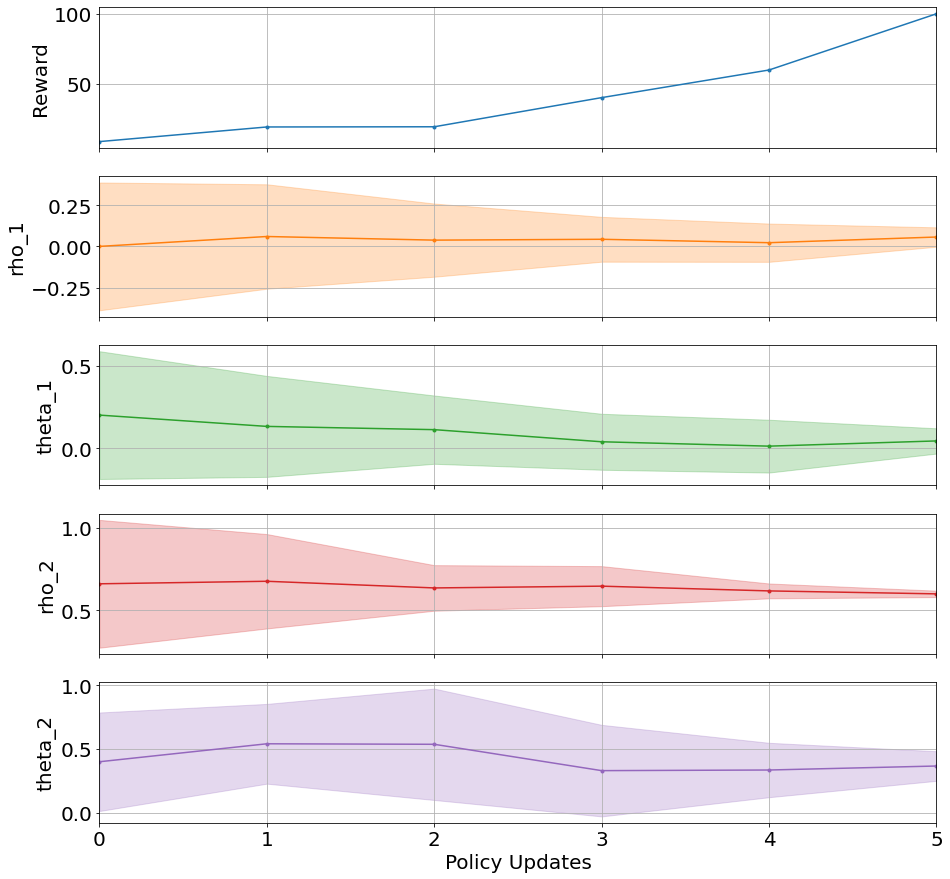

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [-0.32869809  0.07658786  0.6283722   0.01173815]


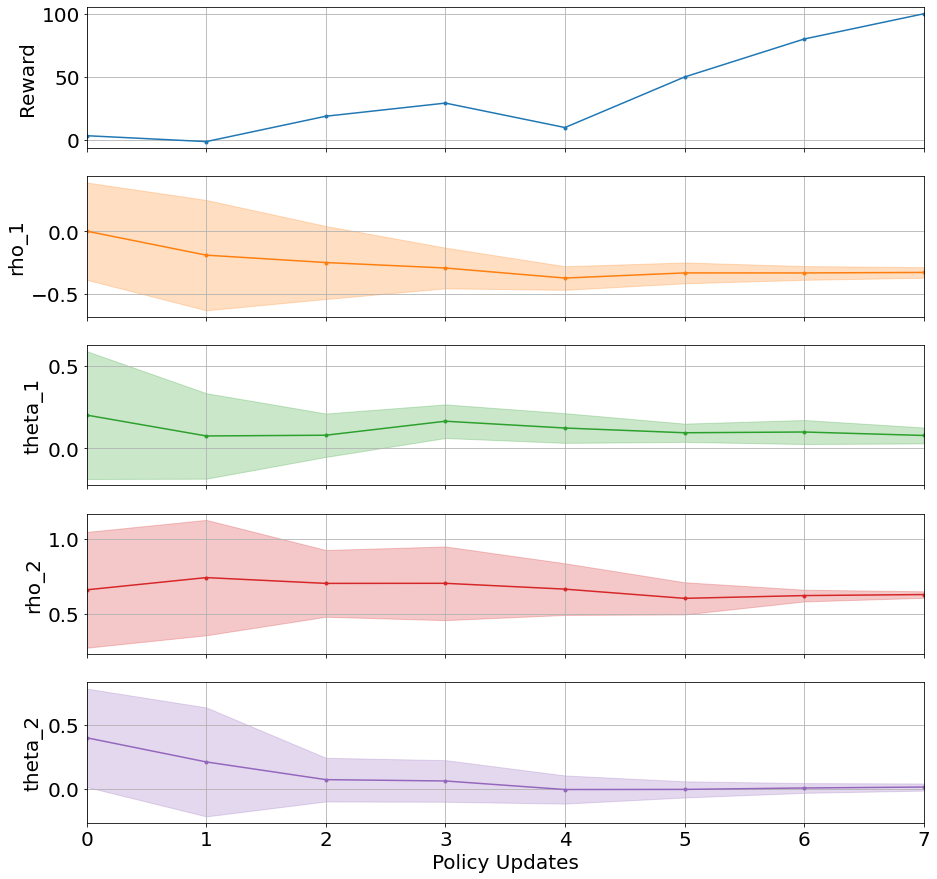

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [-0.91378936 -0.11763133  0.59594927  0.7575906 ]


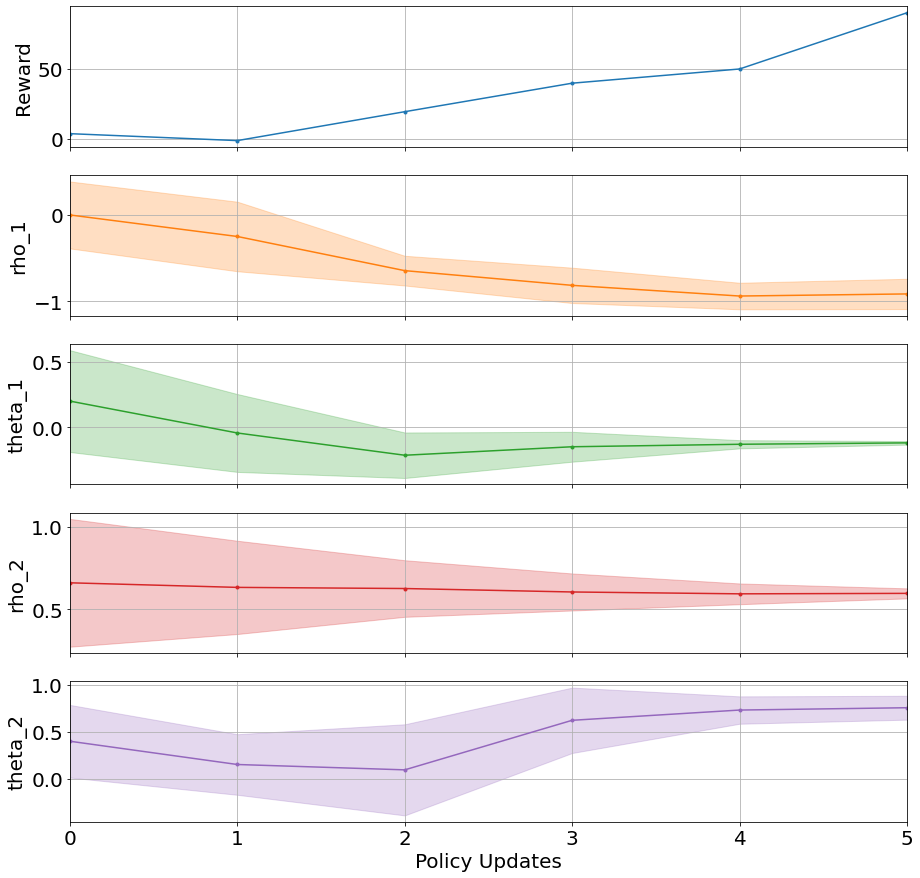

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [-0.29091681  0.02491167  0.58151854  0.2036958 ]


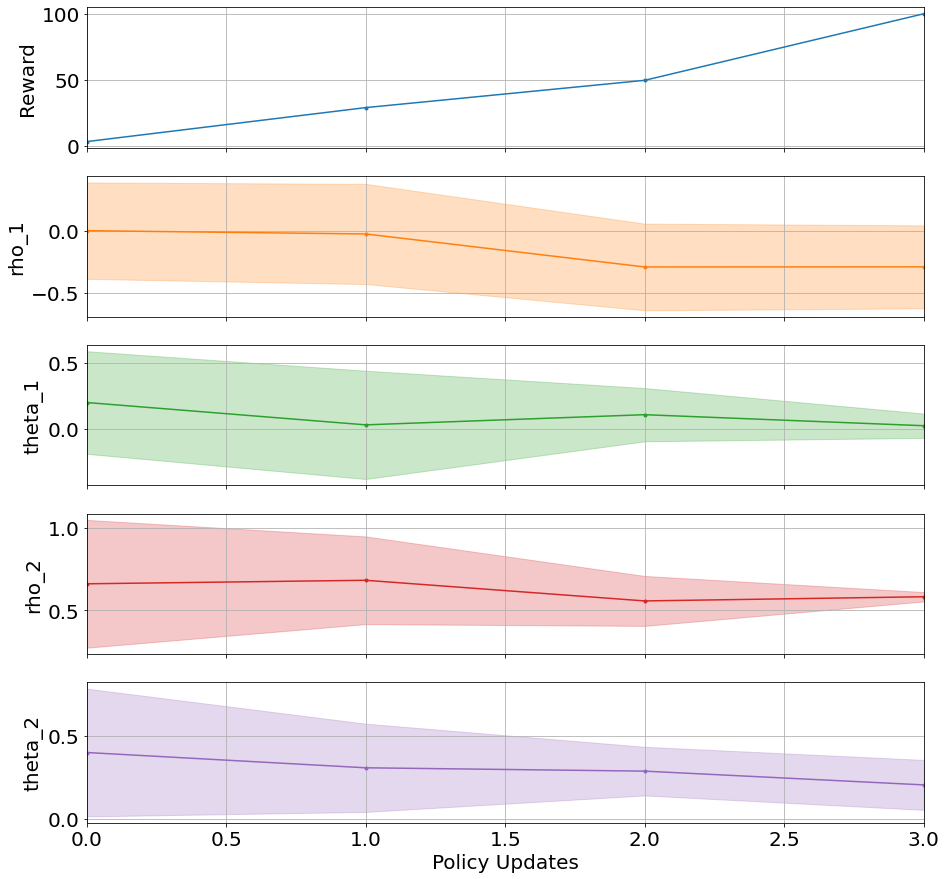

REPS solve info for "1":
 -> Solved: True
 -> Parameters (mean): [-0.13539992  0.034109    0.5976335   0.15056196]


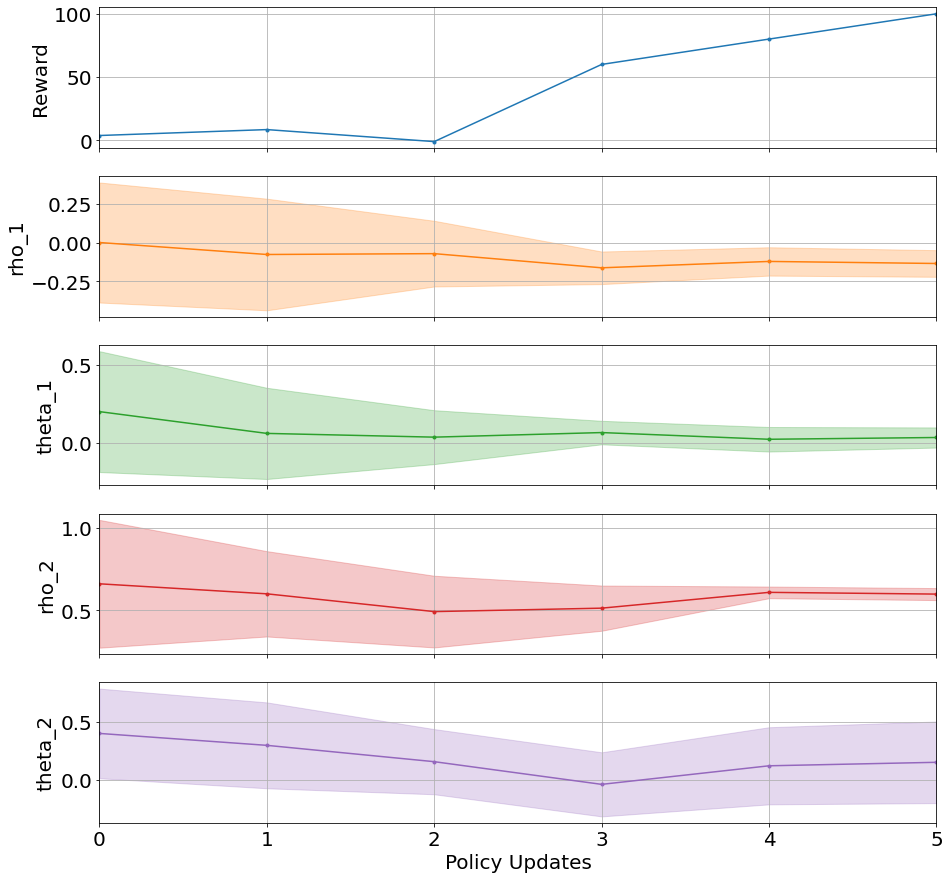

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [ 0.19558959 -0.06072445  0.55201522 -0.00488814]


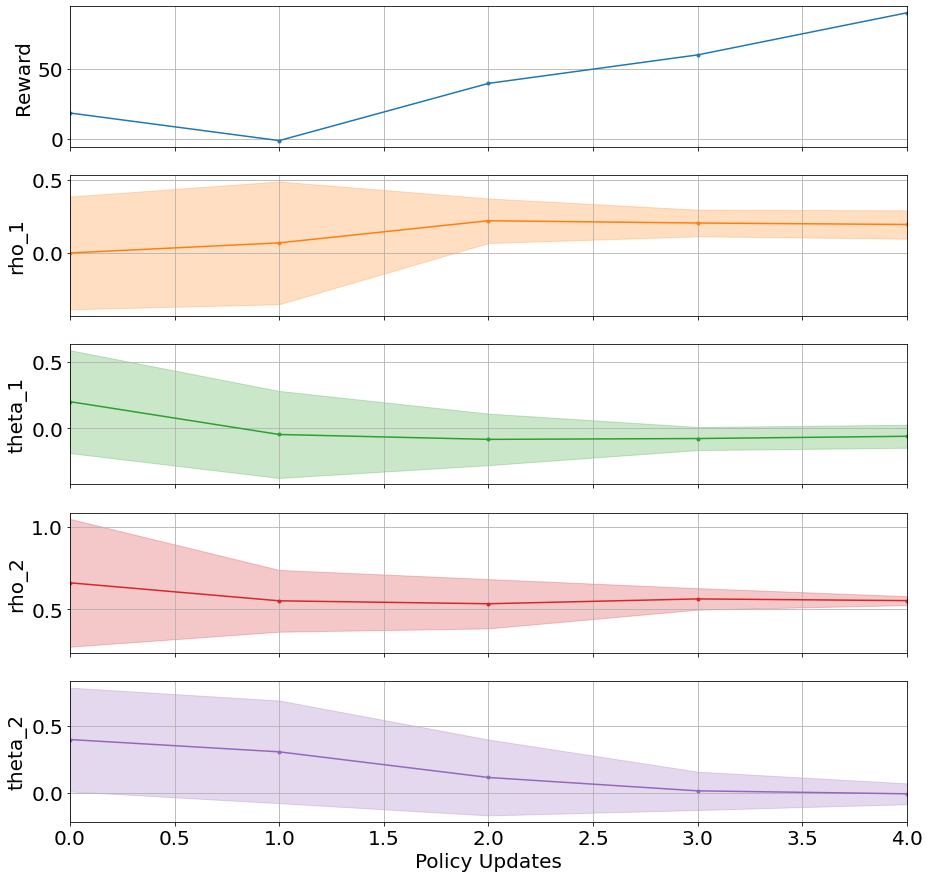

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [-0.22206252  0.22853142  0.50545129  0.10899495]


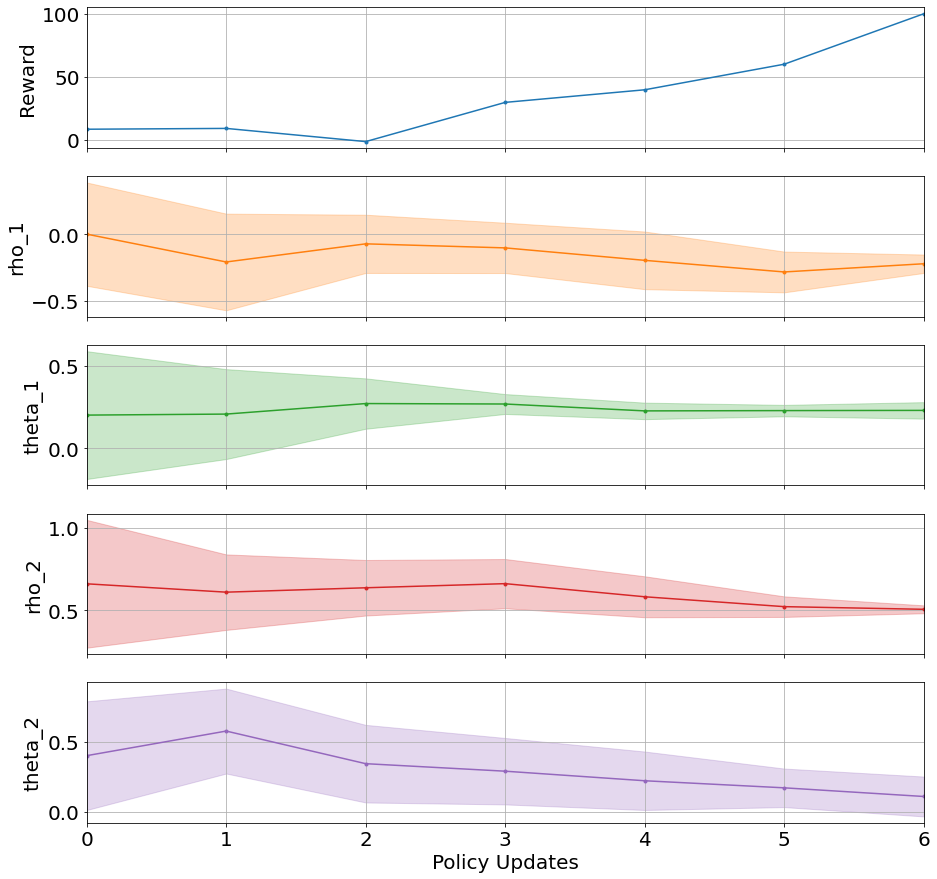

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [ 0.22732146 -0.09780105  0.57204957  0.4999559 ]


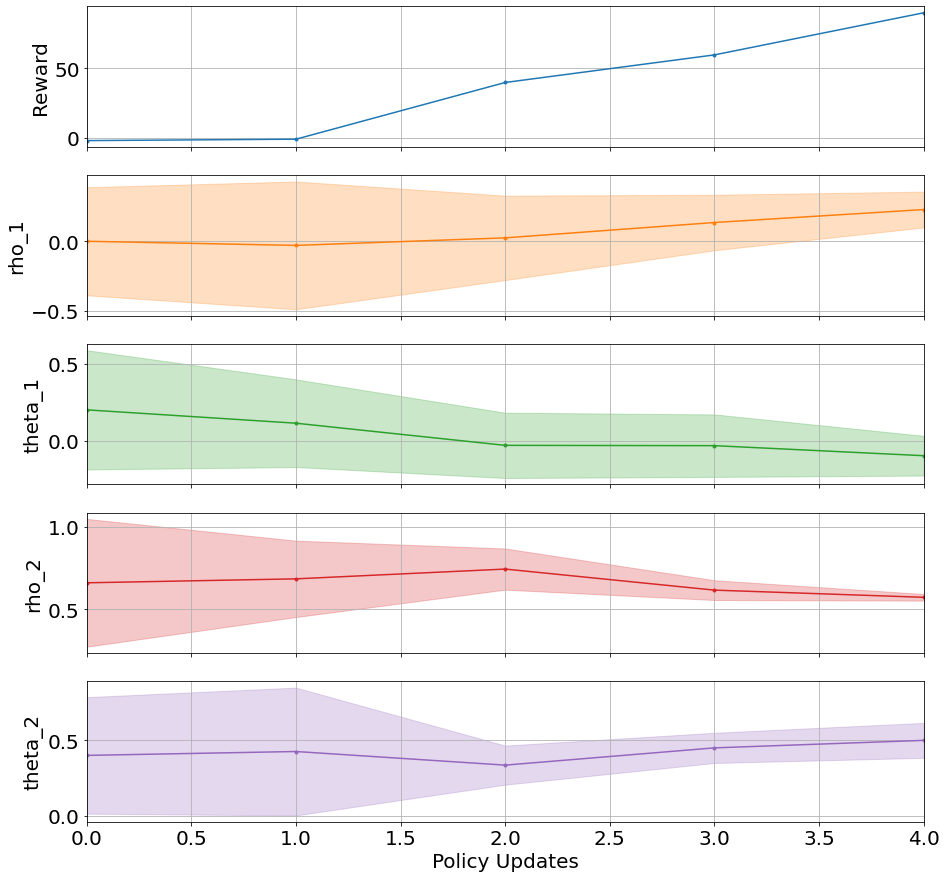

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [0.03101727 0.01650094 0.57087193 0.54788386]


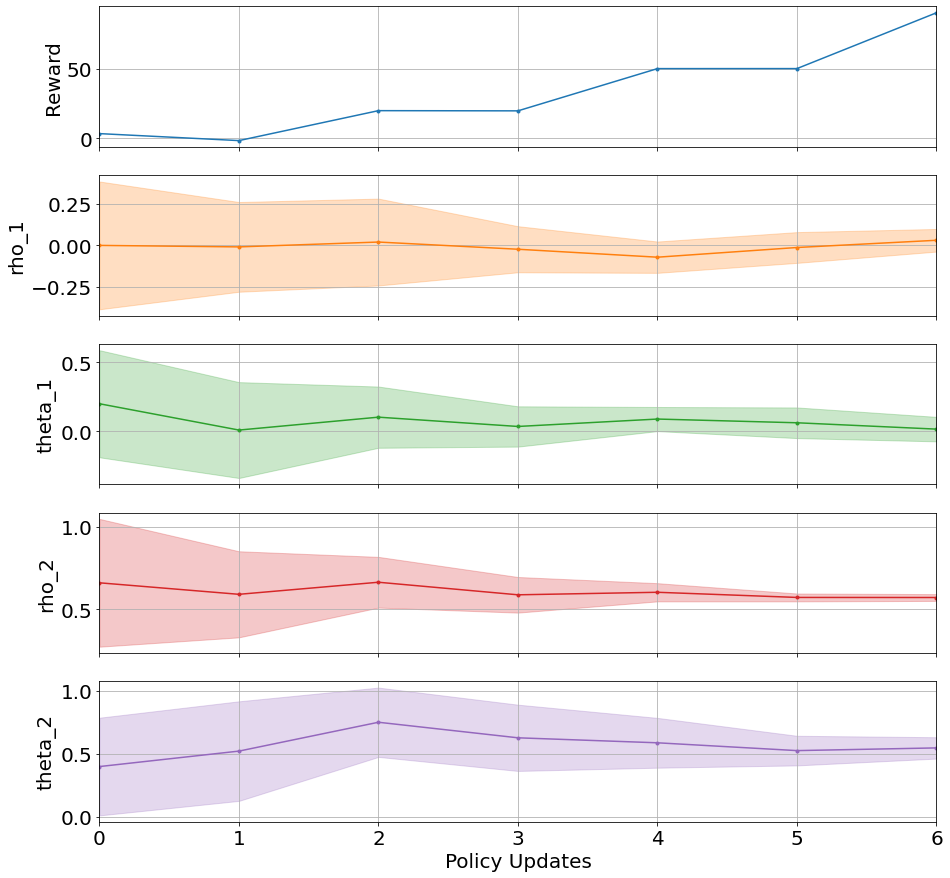

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [-0.17684509 -0.06115669  0.52928839  0.65850273]


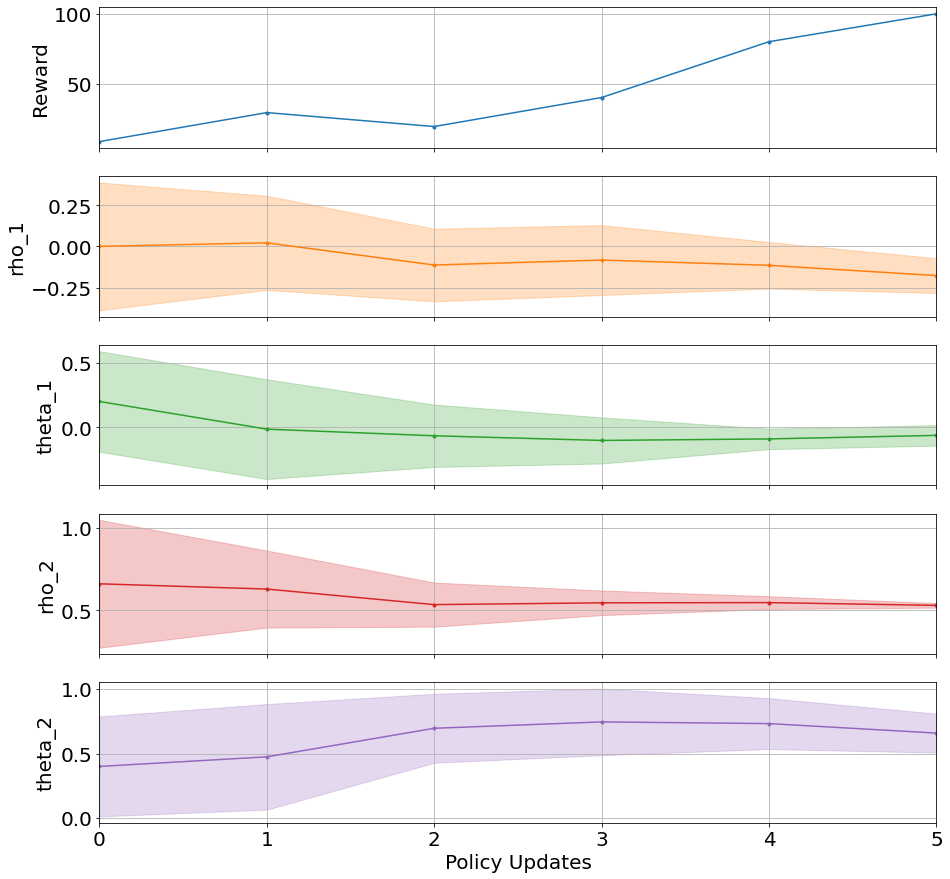

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [-0.29451789 -0.15000998  0.4916012   0.11591229]


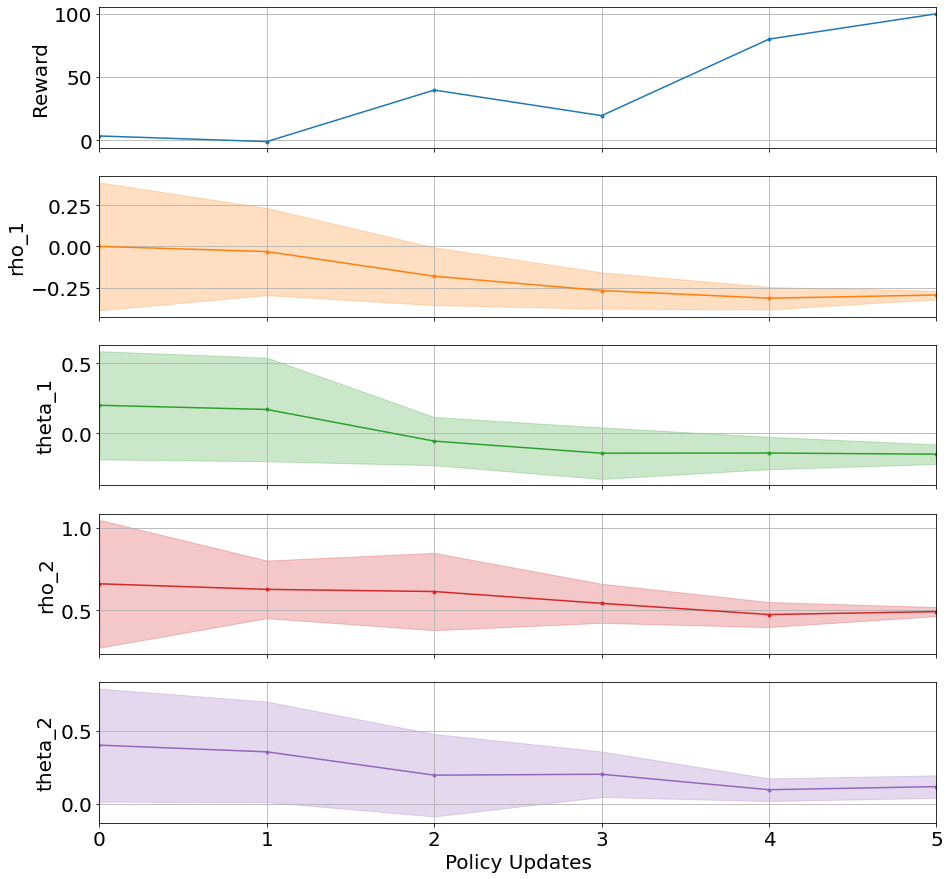

REPS solve info for "2":
 -> Solved: True
 -> Parameters (mean): [0.00866538 0.25335453 0.47391055 0.17742184]


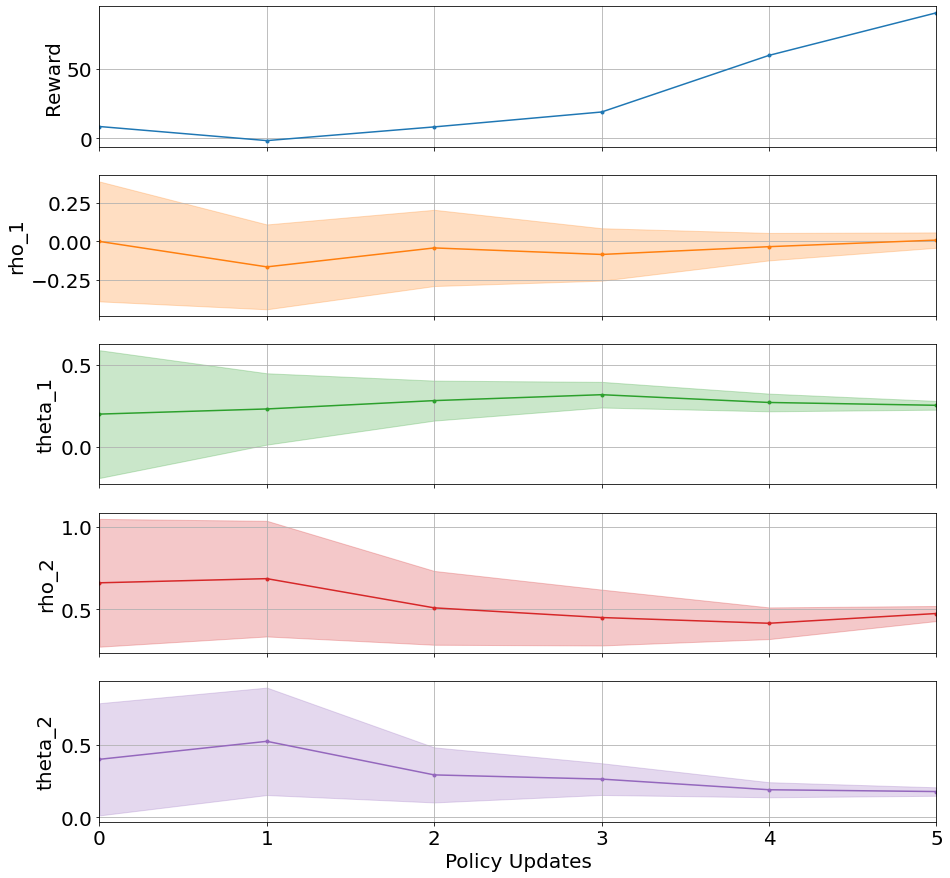

In [180]:
import matplotlib.pyplot as plt
from itertools import cycle
plt.rcParams.update({'font.size': 20})

robo_rewards = {}
params = ['rho_1', 'theta_1', 'rho_2', 'theta_2']

for i in robot_data:
    robo_rewards[i] = []
    for path in robot_data[i]:
        with open(path, 'rb') as handle:
            reps_policy_loaded = pickle.load(handle)

        verbose = True
        path_to_reps_info = i
        solve_env_info = reps_policy_loaded['solve_env_info']

        reps_converged = solve_env_info["reps_converged"]
        policy_params_mean = solve_env_info["policy_params_mean"]
        mean_param_hist = solve_env_info["history"]["policy_params_mean"]
        var_diag_param_hist = solve_env_info["history"]["policy_params_var_diag"]
        mean_rew_hist = solve_env_info["history"]["mean_reward"]

        num_params = len(solve_env_info["policy_params_mean"])
        num_reps_attempts = solve_env_info["num_reps_attempts"]

        # this might be a ragged array, so we flatten it
        assert len(mean_rew_hist) == num_reps_attempts
        mean_rew_hist_all_attempts = np.hstack(
            [mean_rew_hist[a] for a in range(num_reps_attempts)]
        )
        iter_param_updates = range(len(mean_rew_hist_all_attempts))

        if verbose:
            print(f'REPS solve info for "{path_to_reps_info}":')
            print(f" -> Solved: {reps_converged}")
            print(f" -> Parameters (mean): {policy_params_mean}")

        num_subplots = num_params + 1
        fig, ax = plt.subplots(num_subplots, 1, sharex=True)
        fig.set_figheight(15)
        fig.set_figwidth(15)
        prop_cycle = plt.rcParams["axes.prop_cycle"]
        colors = cycle(prop_cycle.by_key()["color"])
        for p in range(num_subplots):

            if p == 0:
                # show reward
                robo_rewards[i].append(mean_rew_hist_all_attempts)
#                 REWW.append(mean_rew_hist_all_attempts)
                ax[p].plot(
                    iter_param_updates,
                    mean_rew_hist_all_attempts,
                    ".-",
                    color=next(colors),
                )
                ax[p].grid()
                ax[p].set_ylabel(f"Reward")

            else:
                idx_p = p - 1
                # this might be a ragged array, so we flatten it
                assert len(mean_param_hist) == num_reps_attempts
                mean_param_hist_all_attempts = np.hstack(
                    [
                        np.array(mean_param_hist[a])[:, idx_p]
                        for a in range(num_reps_attempts)
                    ]
                )
                # assert len(mean_param_hist_all_attempts) == (num_reps_param_updates + 1)

                assert len(var_diag_param_hist) == num_reps_attempts
                var_diag_param_hist_all_attempts = np.hstack(
                    [
                        np.array(var_diag_param_hist[a])[:, idx_p]
                        for a in range(num_reps_attempts)
                    ]
                )

                stdev_diag_param_hist_all_attempts = np.sqrt(
                    var_diag_param_hist_all_attempts
                )

                assert len(mean_param_hist_all_attempts) == len(
                    stdev_diag_param_hist_all_attempts
                )
                assert len(mean_param_hist_all_attempts) == len(iter_param_updates)

                mean_p_stdev = (
                    mean_param_hist_all_attempts + stdev_diag_param_hist_all_attempts
                )
                mean_m_stdev = (
                    mean_param_hist_all_attempts - stdev_diag_param_hist_all_attempts
                )

                this_color = next(colors)

                ax[p].plot(
                    iter_param_updates,
                    mean_param_hist_all_attempts,
                    ".-",
                    color=this_color,
                )
                ax[p].fill_between(
                    iter_param_updates,
                    mean_p_stdev,
                    mean_m_stdev,
                    alpha=0.25,
                    color=this_color,
                )
                ax[p].grid()
                ax[p].set_ylabel(f"{params[idx_p]}")

            if p == (num_subplots - 1):
                ax[p].set_xlabel("Policy Updates")
#         plt.suptitle('Convergence of Parameters using REPS')
        plt.xlim((iter_param_updates[0], iter_param_updates[-1]))
        plt.savefig(path.replace('pickle','png'),facecolor='white', transparent=False)
        plt.show()

In [108]:
df = pd.DataFrame(robo_rewards[0]).T.fillna(0)
minv = df.min(axis=1).values
maxv = df.max(axis=1).values

np.max([np.max(i) for i in robo_rewards[0]])

100.0

In [177]:
plotting_lists = []

x = []
for rewards in robo_rewards:
    
    df = pd.DataFrame(robo_rewards[rewards]).T.fillna(100)
    minv = df.min(axis=1).values
    maxv = df.max(axis=1).values
    meanv = df.mean(axis=1).values
    std_dev = df.std(axis=1).values
    print(std_dev)
    if len(meanv)>len(x): x = range(len(meanv))
    plotting_lists.append((x, minv, maxv, meanv))

[ 7.65985625  5.40499004 12.9689643  15.34770428 21.05865441 29.5913868
 23.05127182 15.12684954  0.        ]
[ 3.38895529 10.75916658 15.44504734 28.93347298 31.61301308 25.2222617
 12.15660121  3.78218616]
[ 6.3901019  11.52257305 16.73411905 18.37129774 20.12770025 21.50236481
  3.78171446]


[6.193872857142856, 4.318923857142857, 13.541201428571428, 22.411122999999996, 39.802962571428566, 54.139095, 85.6853297142857, 94.28258828571428, 100.0]
[6.193872857142856, 4.318923857142857, 13.541201428571428, 22.411122999999996, 39.802962571428566, 54.139095, 85.6853297142857, 94.28258828571428, 100.0] 0
[4.21897, 10.373647285714286, 19.316093142857145, 44.06303357142857, 54.18772357142858, 79.96390742857143, 91.42423385714287, 98.570468]
[4.21897, 10.373647285714286, 19.316093142857145, 44.06303357142857, 54.18772357142858, 79.96390742857143, 91.42423385714287, 98.570468, 100] 1
[6.922693785714285, 4.524785285714285, 23.55268828571429, 35.326389142857145, 69.86878742857142, 85.7071267142857, 98.57064628571428]
[6.922693785714285, 4.524785285714285, 23.55268828571429, 35.326389142857145, 69.86878742857142, 85.7071267142857, 98.57064628571428, 100, 100] 2


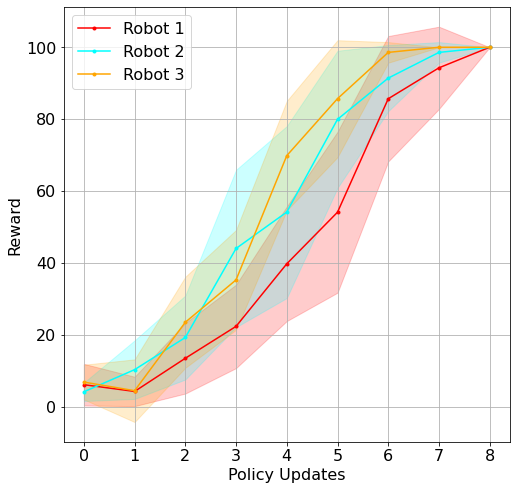

In [179]:
color = ['red', 'cyan','orange']
plt.figure(figsize=(8,8))
plt.rcParams.update({'font.size': 16})

plotting_lists = []

x = []
for rewards in robo_rewards:
    
    df = pd.DataFrame(robo_rewards[rewards]).T.fillna(100)
    meanv = df.mean(axis=1).values
    std_dev = df.std(axis=1).values
    minv = meanv - std_dev*2/np.sqrt(7)
    maxv = meanv + std_dev*2/np.sqrt(7)
    if len(meanv)>len(x): x = range(len(meanv))
    plotting_lists.append((x, minv, maxv, meanv))
#     for mean_rew_hist_all_attempts in robo_rewards[rewards]:
#         iter_param_updates = range(len(mean_rew_hist_all_attempts))
#         if len(iter_param_updates)>len(x): x = iter_param_updates
#         line = plt.plot(
#             iter_param_updates,
#             mean_rew_hist_all_attempts,
#             ".-",
#             color=color[rewards],
#         )

for num, lst in enumerate(plotting_lists):
    diff = len(x) - len(lst[3])
    meanv = list(lst[3])
    minv = list(lst[1])
    maxv = list(lst[2])
    print(meanv)
    for i in range(diff):
        meanv.extend([100])
        minv.extend([100])
        maxv.extend([100])
    
    print(meanv, diff)
    line = plt.plot(
        x,
        meanv,
        ".-",
        color=color[num],
    )
    plt.grid()
    line[0].set_label(f'Robot {num+1}')
    plt.fill_between(x, minv, maxv, alpha=0.2, color=color[num])
#     plt.title(f"Combined Robot Experiments")

plt.ylabel(f"Reward")
plt.xlabel("Policy Updates")
plt.legend()
#     plt.title(f"Robot_{rewards}")
plt.savefig(f'./rewards/rewards_combined.png', facecolor="white")
plt.show()

In [63]:
robo_best_params = {}

for i in robot_data:
    robo_best_params[i] = []
    for path in robot_data[i]:
        with open(path, 'rb') as handle:
            reps_policy_loaded = pickle.load(handle)

        solve_env_info = reps_policy_loaded['solve_env_info']

        reps_converged = solve_env_info["reps_converged"]
        policy_params_mean = solve_env_info["policy_params_mean"]
        mean_param_hist = solve_env_info["history"]["policy_params_mean"]
        var_diag_param_hist = solve_env_info["history"]["policy_params_var_diag"]
        mean_rew_hist = solve_env_info["history"]["mean_reward"]

        num_params = len(solve_env_info["policy_params_mean"])
        num_reps_attempts = solve_env_info["num_reps_attempts"]

        mean_rew_hist_all_attempts = np.hstack([mean_rew_hist[a] for a in range(num_reps_attempts)]        )

        num_subplots = num_params + 1
        for p in range(num_subplots):
            if p==0 or p==4: 
#                 print(mean_rew_hist_all_attempts[-1])
                continue
            else:
                idx_p = p-1
                mean_param_hist_all_attempts = np.hstack([np.array(mean_param_hist[a])[:, idx_p] for a in range(num_reps_attempts)])
                var_diag_param_hist_all_attempts = np.hstack([np.array(var_diag_param_hist[a])[:, idx_p] for a in range(num_reps_attempts)])

                stdev_diag_param_hist_all_attempts = np.sqrt(var_diag_param_hist_all_attempts)

#                 print(mean_param_hist_all_attempts[-1], stdev_diag_param_hist_all_attempts[-1])
                robo_best_params[i].append((mean_param_hist_all_attempts[-1], stdev_diag_param_hist_all_attempts[-1]))

In [69]:
robo_best_params[0]

[(-0.06989598315511522, 0.01990971897387629),
 (-0.012571588546145849, 0.04651806873745521),
 (0.7263259542086421, 0.03429324612074832),
 (-0.039154162132551316, 0.09985087886634075),
 (-0.10633106022364056, 0.06874682673121807),
 (0.740560103154305, 0.02319172329536586),
 (0.02508761334661141, 0.022411641293893333),
 (0.1422486831364545, 0.06510898125608561),
 (0.7288965915893173, 0.024329834766795396),
 (-0.15750939925782165, 0.0749677217031839),
 (0.13289005845957821, 0.02358976931934372),
 (0.696958059842082, 0.0072561435437567805),
 (0.34015679512781705, 0.012647322382455441),
 (0.18148755383752313, 0.008176781553256154),
 (0.7430156005527906, 0.027429987813693314),
 (-0.451370154588421, 0.23019728383980803),
 (0.1059303065398879, 0.10498213727212428),
 (0.6996111585846637, 0.023175424141693147),
 (0.2323700949514522, 0.03141131851200754),
 (0.10087455674529817, 0.012223150913058674),
 (0.7442577012275245, 0.024942677990524055)]

In [176]:
rho1, theta1, rho2 = robo_best_params[2][6:9]
theta2 = rho2

rho1s = np.array([np.random.multivariate_normal(
                    mean=[rho1[0]],
                    cov=np.eye(1)*rho1[1]**2,
                    size=1,) for i in range(100)])
theta1s = np.array([np.random.multivariate_normal(
                    mean=[theta1[0]],
                    cov=np.eye(1)*theta1[1]**2,
                    size=1,) for i in range(100)])
rho2s = np.array([np.random.multivariate_normal(
                    mean=[rho2[0]],
                    cov=np.eye(1)*rho2[1]**2,
                    size=1,) for i in range(100)])
theta2s = np.array([np.random.multivariate_normal(
                    mean=[theta2[0]],
                    cov=np.eye(1)*theta2[1]**2,
                    size=1,) for i in range(100)])
# print(theta)
# print(np.min(a),np.max(a))
temp = (rho1s + 1)*(8.5)
temp = (theta2s + 1)*(180)
print(np.min(temp),np.max(temp))

272.9583810293152 290.7886015112755


In [102]:
import potentiometer_complex

test_robot = 3
pot = potentiometer_complex.Potentiometer(test_robot)

robo_dict = {
"Robot0": [[-3, 8], [-7,5]],
"Robot2": [[-5, 6], [-11,1]],
"Robot3": [[-9, 6], [-11,2]],
}


pot.set_resistance(5000, 10000)
pot.set_points(*robo_dict[f'Robot{test_robot}'])

pot.reset()

for i,j,k,l in zip(rho1s[:5], theta1s[:5], rho2s[:5], theta2s[:5]):
    print(i,j,k,l)
    rho1, rho2 = (i + 1)*5, (k + 1)*5
    theta1, theta2 = (j + 1)*np.pi, (l + 1)*np.pi

    if theta1 < pot.theta_ccw_start or theta1>np.pi*4/3:
        print(f"Out of Scope Prediction {theta1/np.pi*180}.")
        continue
    elif theta2 < np.pi*4/3 or theta2 > 2*np.pi:
        print(f"Out of Scope Prediction {theta2/np.pi*180}.")
        continue
    else:
        thetas1 = list(np.linspace(pot.theta_ccw_start, theta1, 3))[1:] 
        thetas2 = list(np.linspace(theta1, theta2, 3))[1:]

        for thetai in thetas1:
            x = rho1*np.cos(thetai)
            y = rho1*np.sin(thetai)
            obs_resistance = pot.delta.go_to(x, y, pot.z_move)

        for thetai in thetas2:
            x = rho2*np.cos(thetai)
            y = rho2*np.sin(thetai)
            obs_resistance = pot.delta.go_to(x, y, pot.z_move)
        obs_resistance = pot.delta.go_to(x, y, pot.z_move)
        obs_resistance = pot.delta.go_to(x, y, pot.z_move)
        print(obs_resistance)
    pot.reset()

[[0.23455583]] [[-0.08437744]] [[0.54659113]] [[0.53010469]]
0


KeyboardInterrupt: 